In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [7]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

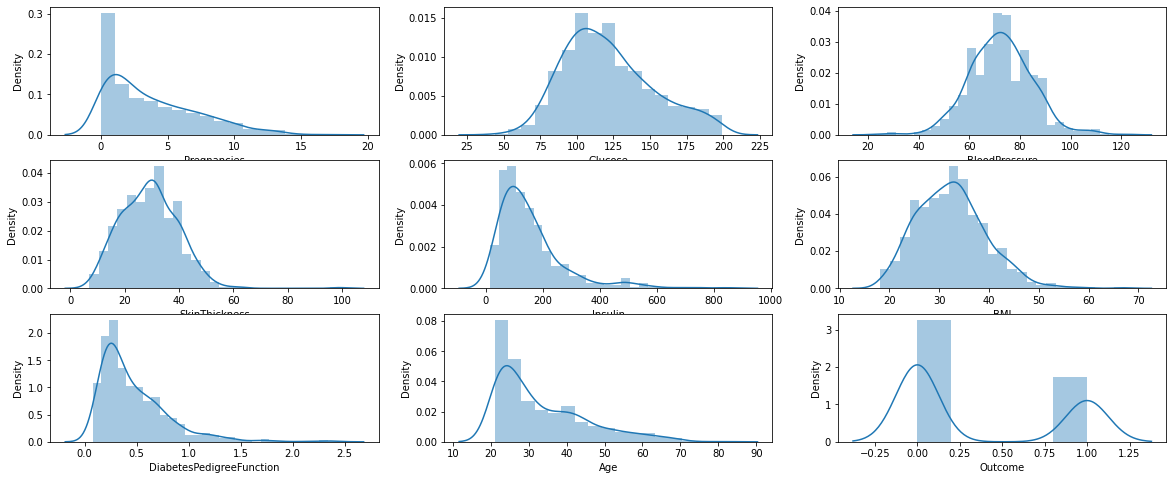

In [8]:
plt.figure(figsize=(20,8))
a=1
for i in df.columns:
    plt.subplot(3,3,a)
    sns.distplot(df[i])
    a+=1

In [9]:
for i in df.columns:
    if (df[i].isnull().sum()/len(df)*100)>0 and (df[i].isnull().sum()/len(df)*100)<29:
        df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i].fillna(df[i].median())

In [10]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

## EDA

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


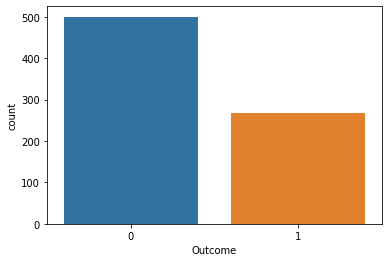

In [12]:
sns.countplot(df['Outcome'])
print(df['Outcome'].value_counts())

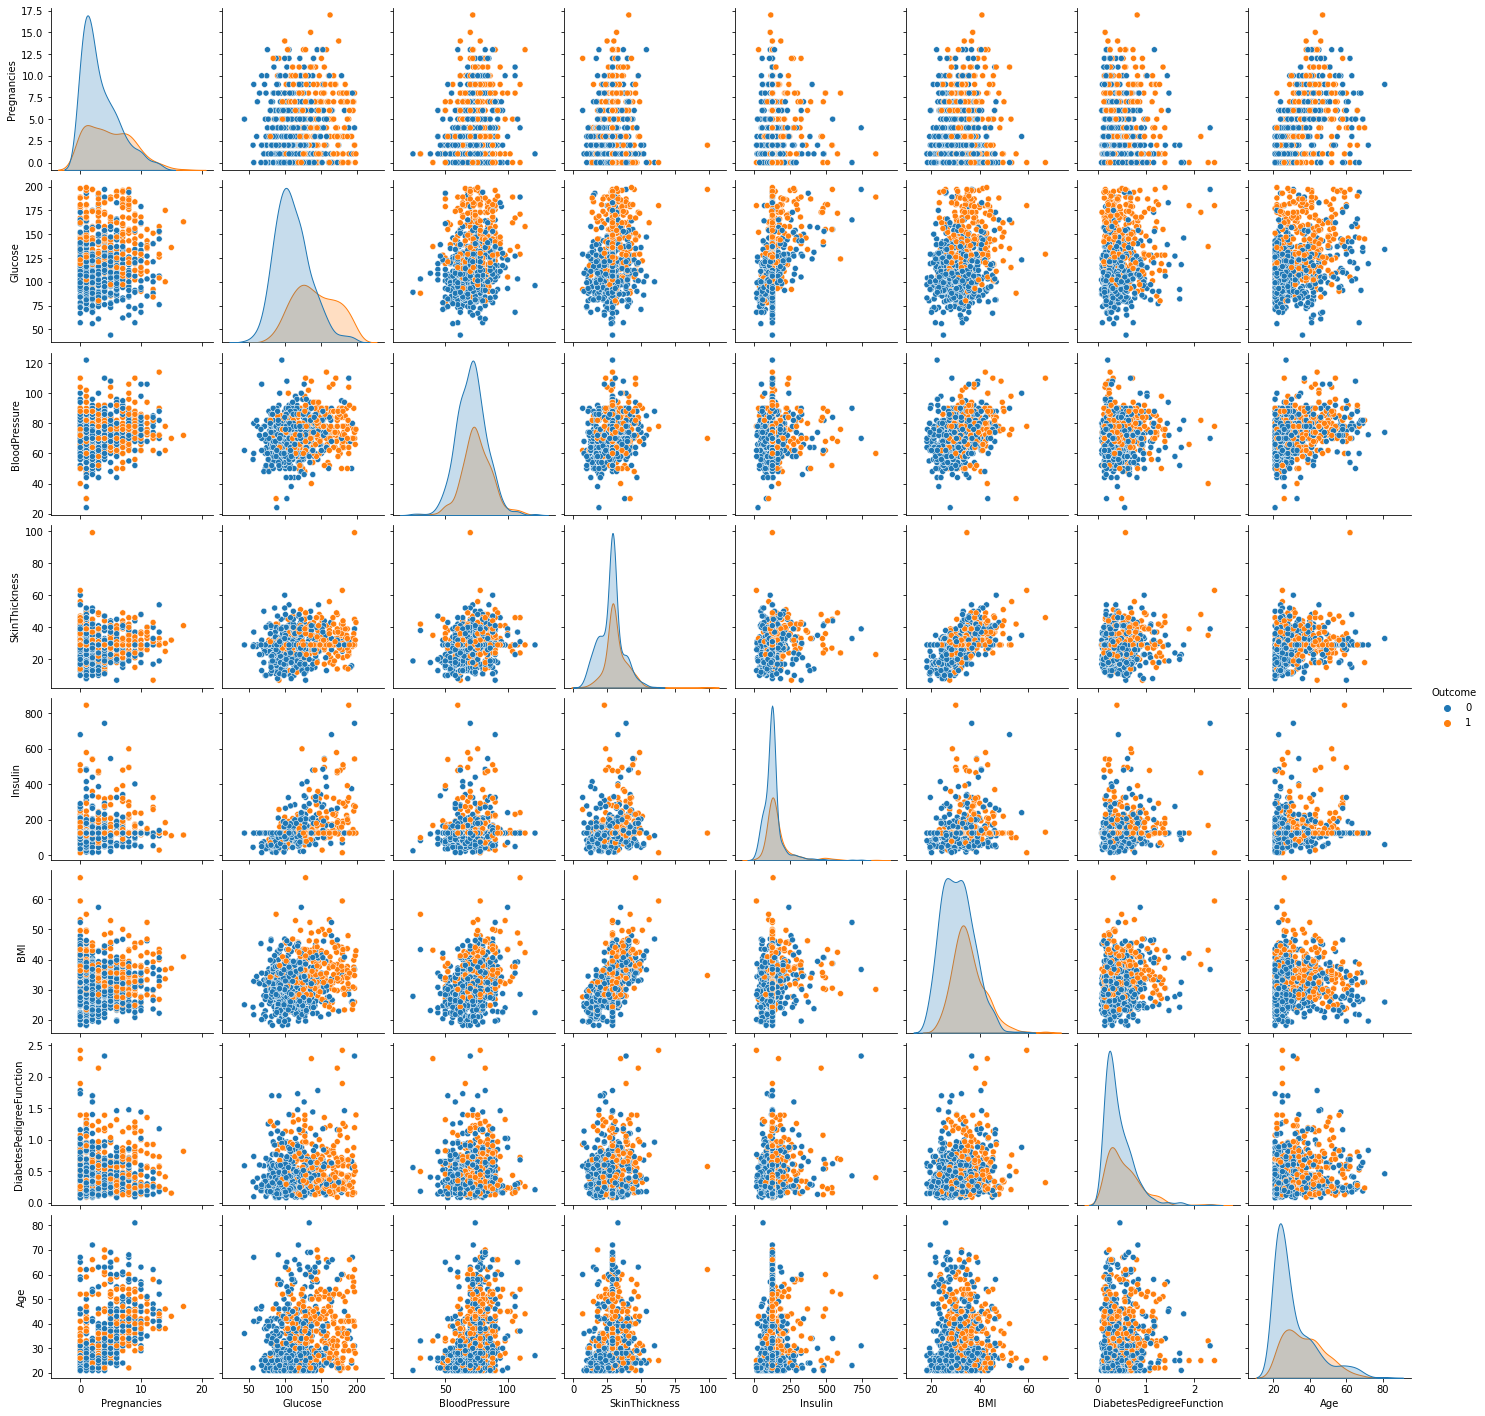

In [13]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot:>

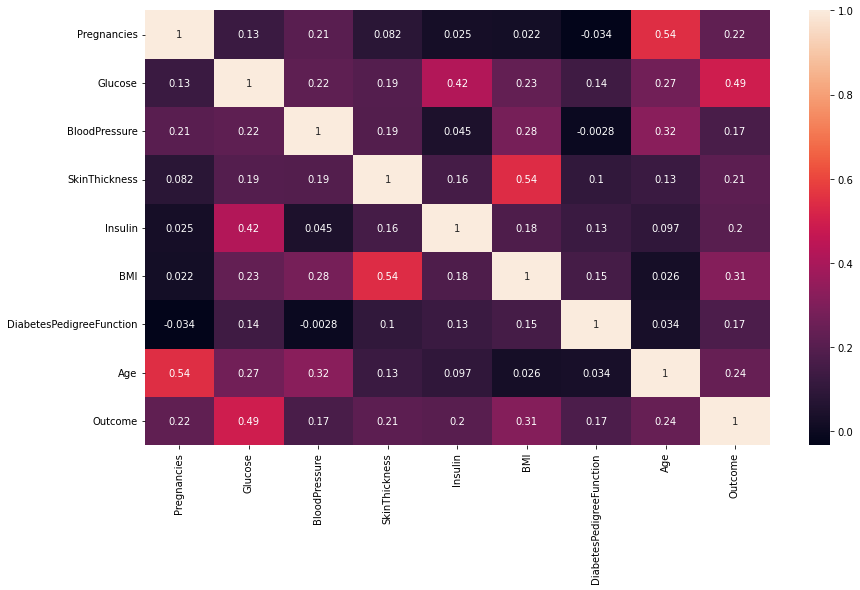

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto')
x_sm,y_sm=sm.fit_resample(x,y)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.2,random_state=777)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [21]:
sc=StandardScaler()

In [22]:
x_train=sc.fit_transform(x_train)

In [23]:
x_test=sc.fit_transform(x_test)

## Model Building

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.85375
Test Data
0.775


In [29]:
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_train=knn.predict(x_train)
    y_pred_test=knn.predict(x_test)
    print('When neighbors is',i)
    print('Train Data')
    print(accuracy_score(y_train,y_pred_train))
    print('Test Data')
    print(accuracy_score(y_test,y_pred_test))
    print('*'*60)

When neighbors is 1
Train Data
1.0
Test Data
0.775
************************************************************
When neighbors is 2
Train Data
0.94375
Test Data
0.695
************************************************************
When neighbors is 3
Train Data
0.87875
Test Data
0.735
************************************************************
When neighbors is 4
Train Data
0.8675
Test Data
0.73
************************************************************
When neighbors is 5
Train Data
0.85375
Test Data
0.775
************************************************************
When neighbors is 6
Train Data
0.835
Test Data
0.755
************************************************************
When neighbors is 7
Train Data
0.83
Test Data
0.76
************************************************************
When neighbors is 8
Train Data
0.815
Test Data
0.76
************************************************************
When neighbors is 9
Train Data
0.81625
Test Data
0.74
*********************************

In [62]:
main=KNeighborsClassifier(n_neighbors=8)
main.fit(x_train,y_train)
y_pred_train=main.predict(x_train)
y_pred_test=main.predict(x_test)
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.815
Test Data
0.76


In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_trainlr=lr.predict(x_train)
y_pred_testlr=lr.predict(x_test)
print('Train Data')
print(accuracy_score(y_train,y_pred_trainlr))
print('Test Data')
print(accuracy_score(y_test,y_pred_testlr))

Train Data
0.74375
Test Data
0.705


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_trainrf=rf.predict(x_train)
y_pred_testrf=rf.predict(x_test)
print('Train Data')
print(accuracy_score(y_train,y_pred_trainrf))
print('Test Data')
print(accuracy_score(y_test,y_pred_testrf))

Train Data
1.0
Test Data
0.795


In [33]:
p_g={'n_neighbors':np.arange(1,30),
   'metric':['minkowski','manhattan','euclidean'],
    'weights':['uniform','distance']}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model=GridSearchCV(knn,p_g,cv=5,scoring='accuracy',n_jobs=-1)

In [36]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=8), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
# model.best_params_

In [38]:
# model.best_score_

In [39]:
y_pred_modeltr=model.predict(x_train)
y_pred_modelte=model.predict(x_test)

In [40]:
print('Train Data')
print(accuracy_score(y_train,y_pred_modeltr))
print('Test Data')
print(accuracy_score(y_test,y_pred_modelte))

Train Data
1.0
Test Data
0.78


In [55]:
p_grf={
    'n_estimators':[20,40,60,80,100],
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,51),
    'min_samples_split':np.arange(5,41,5),
}

In [56]:
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(rf,param_grid=p_grf,scoring='accuracy',cv=5,n_jobs=-1)
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='accuracy')

In [57]:
y_pred_modeltr_gcv=gridcv.predict(x_train)
y_pred_modelte_gcv=gridcv.predict(x_test)

In [58]:
print('Train Data')
print(accuracy_score(y_train,y_pred_modeltr_gcv))
print('Test Data')
print(accuracy_score(y_test,y_pred_modelte_gcv))

Train Data
0.9975
Test Data
0.79


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_modeltr_gb=gb.predict(x_train)
y_pred_modelte_gb=gb.predict(x_test)
print('Train Data')
print(accuracy_score(y_train,y_pred_modeltr_gb))
print('Test Data')
print(accuracy_score(y_test,y_pred_modelte_gb))

Train Data
0.9125
Test Data
0.77


In [45]:
# import tensorflow as tf
# from tensorflow.keras import Sequential 
# from tensorflow.keras.layers import Dense

In [46]:
# ann=Sequential()
# ann.add(Dense(units=6,activation="relu")) 
# ann.add(Dense(units=1,activation="sigmoid"))

In [47]:
# ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [48]:
# ann.fit(x_train,y_train,batch_size=20,epochs=100)

In [49]:
# y_pred=ann.predict(x_test)

In [50]:
# from sklearn.metrics import classification_report
# y_pred=np.where(y_pred<0.5,0,1)
# print(classification_report(y_test,y_pred))

In [63]:
import pickle
pickle.dump(main,open('diabetes.pkl','wb'))